#Regression with Biwi head pose dataset

This is a more advanced example to show how to create custom datasets and do regression with images. Our task is to find the center of the head in each image. The data comes from the the [Biwi head pose dataset](https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db), thanks to Gabriele Fanelli al. The dataset link provided by fastai is [this](https://s3.amazonaws.com/fast-ai-imagelocal/biwi_head_pose.tgz).

Citation for the dataset:- 

    @article{fanelli_IJCV,
    author = {Fanelli, Gabriele and Dantone, Matthias and Gall, Juergen and Fossati, Andrea and Van Gool, Luc},
    title = {Random Forests for Real Time 3D Face Analysis},
    journal = {Int. J. Comput. Vision},
    year = {2013},
    month = {February},
    volume = {101},
    number = {3},
    pages = {437--458}
}

The database contains 24 sequences acquired with a Kinect sensor. 20 people (some were recorded twice - 6 women and 14 men) were recorded while turning their heads, sitting in front of the sensor, at roughly one meter of distance. 

This dataset is just for estimation and not for tracking since the images are continuous.

The dataset can be used to perform a bunch of things but here we are only doing the problem of finding the center of the face in the images which is an image regression problem.


In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

Getting and converting the data

In [3]:
path = untar_data(URLs.BIWI_HEAD_POSE); path

PosixPath('/root/.fastai/data/biwi_head_pose')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/biwi_head_pose/02.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/09'),
 PosixPath('/root/.fastai/data/biwi_head_pose/18'),
 PosixPath('/root/.fastai/data/biwi_head_pose/18.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/01.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/10.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/21'),
 PosixPath('/root/.fastai/data/biwi_head_pose/06.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07'),
 PosixPath('/root/.fastai/data/biwi_head_pose/02'),
 PosixPath('/root/.fastai/data/biwi_head_pose/12.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/readme.txt'),
 PosixPath('/root/.fastai/data/biwi_head_pose/17'),
 PosixPath('/root/.fastai/data/biwi_head_pose/14.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/01'),
 PosixPath('/root/.fastai/data/biwi_head_pose/03.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/04.obj'),
 PosixPath('/roo

In [5]:
(path/'07').ls()

[PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00067_rgb.jpg'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00246_pose.txt'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00666_pose.txt'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00315_rgb.jpg'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00017_pose.txt'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00595_pose.txt'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00730_pose.txt'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00292_pose.txt'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00496_rgb.jpg'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00723_rgb.jpg'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00734_pose.txt'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00012_rgb.jpg'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00014_rgb.jpg'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07/frame_00

In [6]:
# In each folder, two .cal files contain calibration information for the depth 
# and the color camera, e.g., the intrinsic camera matrix of the depth camera 
# and the global rotation and translation to the rgb camera.

! cat ~/.fastai/data/biwi_head_pose/01/rgb.cal

517.679 0 320 
0 517.679 240.5 
0 0 1 

0 0 0 0 

0.999947 0.00432361 0.00929419 
-0.00446314 0.999877 0.0150443 
-0.009228 -0.015085 0.999844 

-24.0198 5.8896 -13.2308 

640 480


In [7]:
# Though in the fastai notebook they have used these calibration settings for 
# all the images but I think the original authors said it is different for differet sequences.
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6); cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [0]:
fname = '09/frame_00667_rgb.jpg'

In [0]:
# This function renames something like 
# '09/fname_006667_rgb.jpg' to 
# '09/fname_006667_pose.txt'

def image2text_name(f): return path/f'{str(f)[:-7]}pose.txt'

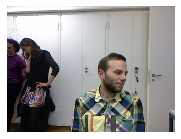

In [10]:
img = open_image(path/fname)
img.show()

In [11]:
# Sample text file
cat '/root/.fastai/data/biwi_head_pose/07/frame_00595_pose.txt'

0.718038 0.216842 0.661363 
0.119977 0.897442 -0.424504 
-0.685585 0.384158 0.618382 

-69.5663 27.5674 838.581 



In [12]:
# skip header - The no of lines to skip at the beginning at the file.
ctr = np.genfromtxt(image2text_name(fname), skip_header=3); ctr

array([187.332 ,  40.3892, 893.135 ])

These functions are done just as shown in the fastai notebooks and not much is explained about them.

In [0]:
def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2, c1])

def get_ctr(f):
    ctr = np.genfromtxt(image2text_name(f), skip_header = 3)
    return convert_biwi(ctr)

def get_ip(img, pts):
    return ImagePoints(FlowField(img.size, pts), scale = True)

In [0]:
# Experimentation
# This could be a little better since it takes different 
# cal files for different sequences

def image2cal(f): return path/f'{str(f)[:-19]}rgb.cal'

def convert_biwi(coords, cal):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2, c1])

def get_ctr(f):
    cal = np.genfromtxt(image2cal(f), skip_footer = 6)
    ctr = np.genfromtxt(image2text_name(f), skip_header = 3)
    return convert_biwi(ctr, cal)

def get_ip(img, pts):
    return ImagePoints(FlowField(img.size, pts), scale = True)

In [15]:
image2cal(fname)

PosixPath('/root/.fastai/data/biwi_head_pose/09/rgb.cal')

In [16]:
doc(ImagePoints)

In [17]:
doc(FlowField)

In [18]:
get_ctr(fname)

tensor([263.9104, 428.5814])

In [0]:
ctr = get_ctr(fname)

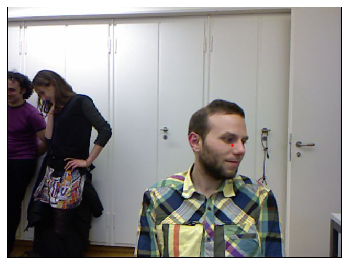

In [20]:
# Overlaid with y argument which in this case is the imagepoint of the 
# center of the face
img.show(y=get_ip(img, ctr), figsize=(6, 6))

In [21]:
doc(img.show)

Creating the dataset

In [0]:
data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name=='13')
        .label_from_func(get_ctr)
        .transform(get_transforms(), tfm_y = True, size = (120, 120))
        .databunch().normalize(imagenet_stats)
        )

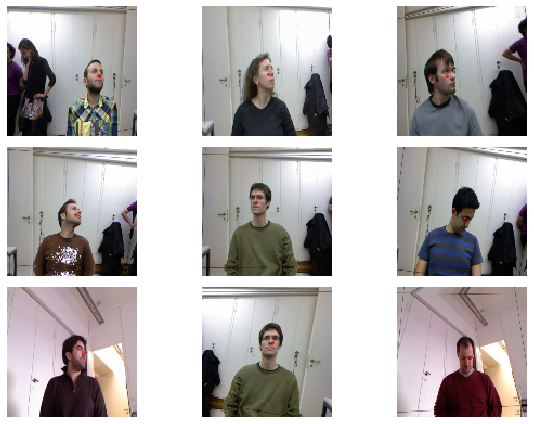

In [23]:
data.show_batch(3, figsize=(9, 6))

In [24]:
! cat ~/.fastai/data/biwi_head_pose/07/rgb.cal

517.679 0 320 
0 517.679 240.5 
0 0 1 

0 0 0 0 

0.999947 0.00432361 0.00929419 
-0.00446314 0.999877 0.0150443 
-0.009228 -0.015085 0.999844 

-24.0198 5.8896 -13.2308 

640 480


Even after taking different cal files for different sequences 
the result is still like in Jeremy's Notebook. So, no advantage of that.

Train model

In [25]:
learn = cnn_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 18.1MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


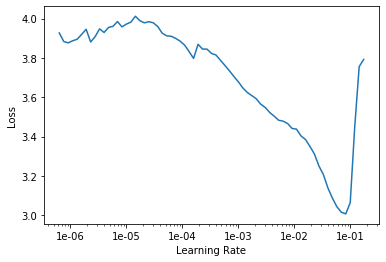

In [26]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-2

In [28]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,time
0,0.191366,0.005835,03:06
1,0.072945,0.083105,03:06
2,0.028354,0.008448,03:05
3,0.013187,0.002207,03:06
4,0.009095,0.001308,03:06


In [0]:
learn.save('stage.1')

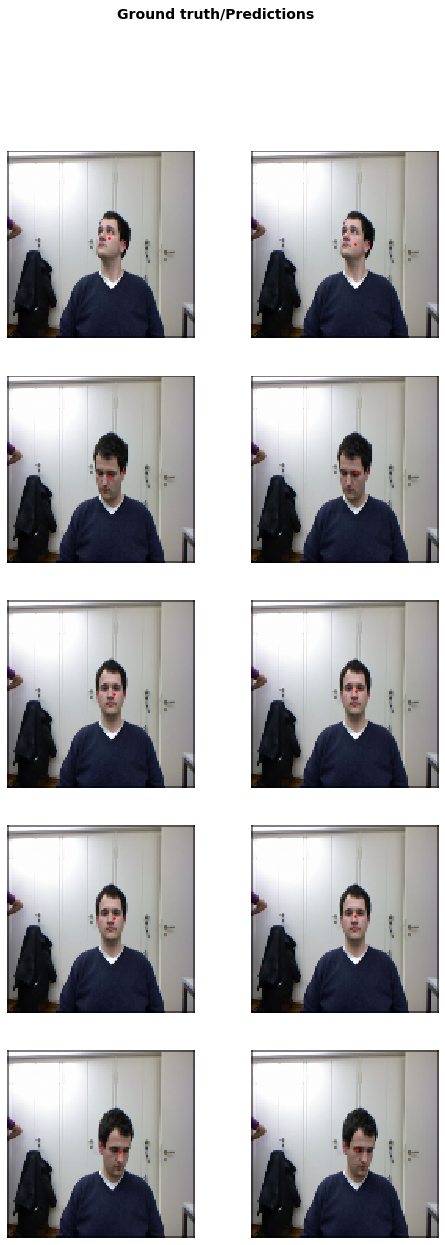

In [30]:
learn.show_results()

Data augmentation

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.5, max_lighting=0.5, max_warp=0.4, p_affine=1., p_lighting=1.)

In [34]:
doc(get_transforms)

In [0]:
data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name=='13')
        .label_from_func(get_ctr)
        .transform(tfms, tfm_y = True, size=(120, 160))
        .databunch().normalize(imagenet_stats)
        )


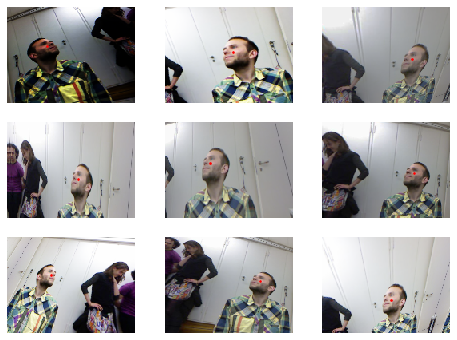

In [37]:
def _plot(i, j, ax):
    x, y = data.train_ds[0]
    x.show(ax, y = y)

plot_multi(_plot, 3, 3, figsize = (8, 6))